# Analiza kategorii w sklepie euro.com.pl

## 1. Wprowadzenie

### 1.1 Cel analizy

<p>
Analiza ma na celu poznanie dostępnych kategorii w sklepie internetowym euro.com.pl należącego do sieci sklepów RTV EURO AGD.
Dowiedzmy się, czy sklep RTV EURO AGD jest bardziej RTV, czy AGD, a może dominują produkty z nietytułowych kategorii. Wnioski z analizy będą pomocne przy analizowaniu promocji, cyklicznie pojawiających się w tym sklepie.
<p>

### 1.2 Pochodzenie zbioru danych

<p>
    Dane z analizowanego pliku pochodzą ze sklepu internetowego euro.com.pl. Zostały zebrane w dniu 31.01.2022 r. W tym celu posłużyłem się skryptem scrapującym napisanym w Pythonie. Kod źródłowy wykorzystanego skryptu oraz plik z zebranymi danymi znajduje się w folderze 'categories' tego repozytorium.
</p>

## 2. Wczytanie potrzebnych bibliotek

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Wczytanie zbioru z danymi

In [53]:
df = pd.read_csv('./categories/categories.csv', header=0)

### 3.1 Przegląd zbioru.

In [54]:
print(f'Zbiór zawiera {df.shape[0]} obserwacji oraz {df.shape[1]} zmiennych.')

Zbiór zawiera 418 obserwacji oraz 4 zmiennych.


In [55]:
print(f'Dostępne zmienne: {df.columns.tolist()}')

Dostępne zmienne: ['parent_category', 'category', 'link_to_category', 'offers_count']


In [56]:
print(f'Typy zmiennych:')
df.dtypes

Typy zmiennych:


parent_category      object
category             object
link_to_category     object
offers_count        float64
dtype: object

In [57]:
print(f'Zbior zawiera {len(df.parent_category.unique())} kategorii głównych:\n{df.parent_category.unique()}')

Zbior zawiera 7 kategorii głównych:
['agd' 'agd-do-zabudowy' 'agd-male' 'rtv' 'telefony-i-nawigacja-gps'
 'komputery' 'gry-i-konsole']


In [58]:
print(f'Zbior zawiera {len(df.category.unique())} kategorii podrzędnych.')

Zbior zawiera 418 kategorii podrzędnych.


In [59]:
nulls = pd.DataFrame({'has_null': df.isnull().any()})
nulls['qty'] = df.isnull().sum()
nulls['%']= round((df.isnull().mean()*100),2)
nulls

,has_null,qty,%
parent_category,False,0,0.0
category,False,0,0.0
link_to_category,False,0,0.0
offers_count,False,0,0.0


<p>
    Zbior nie zawiera obserwacji, w których brakowało by danych.
</p>

## 4. Analiza zbioru

<p>
Na potrzeby dalszej analizy wykorzystywać będę wszystkie zmienne oprócz zmiennej zawierającej link do danej kategorii w sklepie euro.com.pl, dlatego ją usunę ze zbioru. Bliżej przyjrzę się samym kategoriom głównym, podrzędnym oraz zmiennej opisującej ilość ofert w poszczególnych kategoriach.
</p>

In [60]:
df.drop('link_to_category', axis=1, inplace=True)

### 4.1 Analiza kategorii głównych

#### 4.1.1 Ogólne podsumowanie ilości ofert oraz ilości kategorii podrzędnych

In [61]:
parent_categories_summary = df.groupby(['parent_category']).agg(offers_count=('offers_count','sum'), categories_count=('category', 'count'))
parent_categories_summary = parent_categories_summary.sort_values(by='offers_count', ascending=False)
parent_categories_summary = parent_categories_summary.reset_index()
parent_categories_summary['percent_of_offers'] = parent_categories_summary.offers_count.apply(lambda x: round(x/parent_categories_summary.offers_count.sum()*100, 2))
parent_categories_summary['percent_of_categories'] = parent_categories_summary.categories_count.apply(lambda x: round(x/parent_categories_summary.categories_count.sum()*100, 2))

parent_categories_summary

,parent_category,offers_count,categories_count,percent_of_offers,percent_of_categories
0,komputery,8858.0,87,23.21,20.81
1,agd-male,7453.0,146,19.53,34.93
2,telefony-i-nawigacja-gps,6457.0,31,16.92,7.42
3,rtv,6250.0,71,16.38,16.99
4,agd,5914.0,39,15.50,9.33
5,gry-i-konsole,1655.0,28,4.34,6.70
6,agd-do-zabudowy,1578.0,16,4.13,3.83


In [91]:
parent_categories_summary.agg(['sum'])[['offers_count','categories_count']].T

,sum
offers_count,38165.0
categories_count,418.0


<p>
Analizując dane z powyższej tabeli można wyciągnąć prosty wniosek, iż obecnie to kategorie 'telefony-i-nawigacja-gps' oraz 'komputery' stanowią największą liczbę ofert w sklepie przy prezentowanym podziale na kategorie.
</p>
<p>
Jeśli chodzi o kategorie uwzglednione w nazwie marki sklepu, to wyraźnie wyróżnia się kategoria 'agd-małe' pod względem ilości ofert oraz kategorii podrzędnych.
</p>
<p>
    Kategorią najmniejszą jest 'gry-i-konsole' - zarówno najmniejszy udział w ofercie oraz kategoriach sklepu.
</p>
<p>
    W tym miejscu warto sięgnąć do definicji sprzetu <a href="https://pl.wikipedia.org/wiki/Artyku%C5%82y_gospodarstwa_domowego">AGD</a> oraz <a href="https://pl.wikipedia.org/wiki/Elektronika_u%C5%BCytkowa">RTV</a>. Uważam tak, gdyż pozwala to zrozumieć, jak wiele innych znaczących kategorii sprzętów elektronicznych wyłoniło się na przestrzeni lat, a które są w ofercie sklepu z założenia na początku mającego sprzedawać tylko sprzęty RTV i AGD.
</p>
<p>
    Sklep ma do zaoferowania ponad 38 tysięcy różnych towarów.
</p>

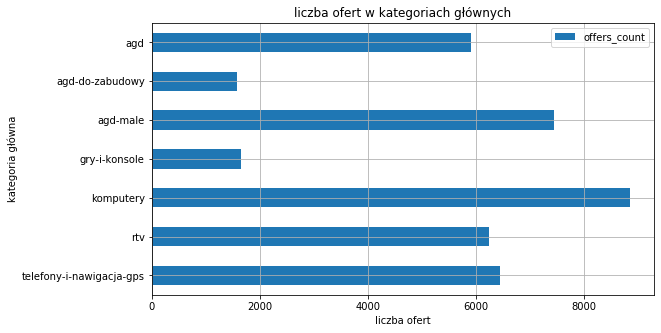

In [63]:
parent_categories_summary[['parent_category','offers_count']].set_index('parent_category').sort_values(by='parent_category', ascending=False).plot.barh(figsize=(9,5))
plt.title('liczba ofert w kategoriach głównych')
plt.xlabel('liczba ofert')
plt.ylabel('kategoria główna')
plt.grid()
plt.savefig('./charts/liczba ofert w kategoriach głównych.png')
plt.show()

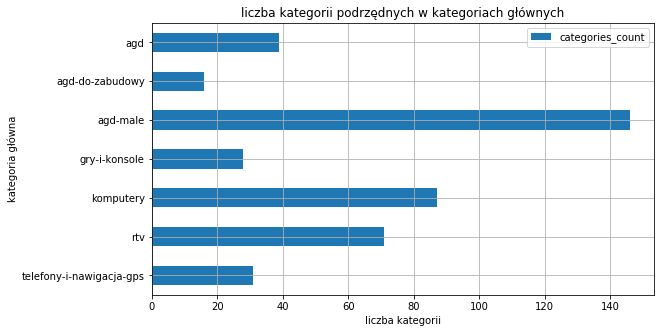

In [64]:
parent_categories_summary[['parent_category','categories_count']].set_index('parent_category').sort_values(by='parent_category', ascending=False).plot.barh(figsize=(9,5))
plt.title('liczba kategorii podrzędnych w kategoriach głównych')
plt.xlabel('liczba kategorii')
plt.ylabel('kategoria główna')
plt.grid()
plt.savefig('./charts/liczba kategorii podrzędnych w kategoriach głównych.png')
plt.show()

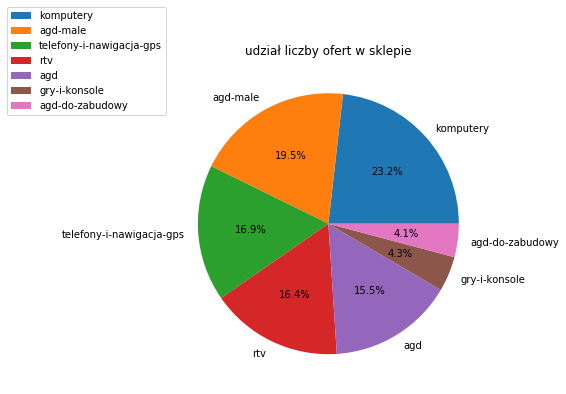

In [159]:
parent_categories_summary[['parent_category','offers_count']].set_index('parent_category').plot.pie(y='offers_count', autopct='%1.1f%%', figsize=(6,6))
plt.legend(loc='center left', bbox_to_anchor=(-0.5, 1))
plt.title('udział liczby ofert w sklepie')
plt.ylabel('')
plt.savefig(f'./charts/udział liczby ofert w sklepie.png')
plt.show()

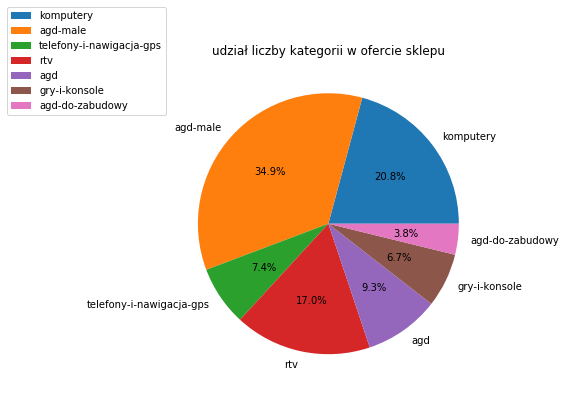

In [158]:
parent_categories_summary[['parent_category','categories_count']].set_index('parent_category').plot.pie(y='categories_count', autopct='%1.1f%%', figsize=(6,6))
plt.legend(loc='center left', bbox_to_anchor=(-0.5, 1))
plt.title('udział liczby kategorii w ofercie sklepu')
plt.ylabel('')
plt.savefig(f'./charts/udział liczby kategorii w ofercie sklepu.png')
plt.show()

#### 4.1.2 Analiza: agd vs rtv vs reszta kategorii

In [65]:
only_within_agd = parent_categories_summary[parent_categories_summary.parent_category.str.contains('agd')]
rtv = parent_categories_summary[parent_categories_summary.parent_category == 'rtv']
without_agd_and_rtv = parent_categories_summary[~parent_categories_summary.parent_category.isin(list(only_within_agd.parent_category) + list(rtv.parent_category))]

In [66]:
only_within_agd

,parent_category,offers_count,categories_count,percent_of_offers,percent_of_categories
1,agd-male,7453.0,146,19.53,34.93
4,agd,5914.0,39,15.50,9.33
6,agd-do-zabudowy,1578.0,16,4.13,3.83


In [67]:
print(f'Suma ofert w kategoriach głównych związanych z AGD: {only_within_agd.offers_count.sum()}')
print(f'Udział ofert z kategorii głównych związanych z AGD w całej ofercie: {round(only_within_agd.percent_of_offers.sum(),2)}%\n')
print(f'Suma kategorii podrzędnych w kategoriach głównych związanych z AGD: {only_within_agd.categories_count.sum()}')
print(f'Udział kategorii podrzędnych związanych z AGD w całym sklepie: {round(only_within_agd.percent_of_categories.sum(),2)}%')

Suma ofert w kategoriach głównych związanych z AGD: 14945.0
Udział ofert z kategorii głównych związanych z AGD w całej ofercie: 39.16%

Suma kategorii podrzędnych w kategoriach głównych związanych z AGD: 201
Udział kategorii podrzędnych związanych z AGD w całym sklepie: 48.09%


In [68]:
rtv

,parent_category,offers_count,categories_count,percent_of_offers,percent_of_categories
3,rtv,6250.0,71,16.38,16.99


In [69]:
without_agd_and_rtv

,parent_category,offers_count,categories_count,percent_of_offers,percent_of_categories
0,komputery,8858.0,87,23.21,20.81
2,telefony-i-nawigacja-gps,6457.0,31,16.92,7.42
5,gry-i-konsole,1655.0,28,4.34,6.70


In [70]:
print(f'Suma ofert w kategoriach głównych niezwiązanych z RTV i AGD: {without_agd_and_rtv.offers_count.sum()}')
print(f'Udział ofert w kategoriach głównych niezwiązanych z RTV i AGD: {without_agd_and_rtv.percent_of_offers.sum()}%\n')
print(f'Suma kategorii podrzędnych w kategoriach głównych niezwiązanych z RTV i AGD: {without_agd_and_rtv.categories_count.sum()}')
print(f'Udział kategorii podrzędnych niezwiązanych z RTV i AGD: {without_agd_and_rtv.percent_of_categories.sum()}%')

Suma ofert w kategoriach głównych niezwiązanych z RTV i AGD: 16970.0
Udział ofert w kategoriach głównych niezwiązanych z RTV i AGD: 44.47%

Suma kategorii podrzędnych w kategoriach głównych niezwiązanych z RTV i AGD: 146
Udział kategorii podrzędnych niezwiązanych z RTV i AGD: 34.93%


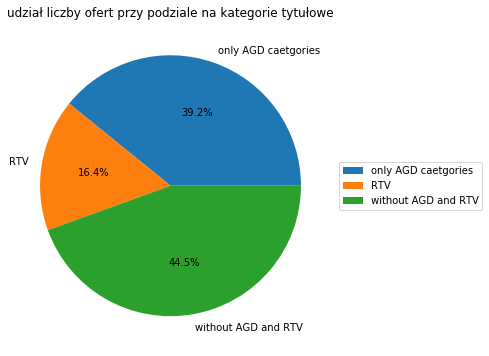

In [125]:
pie_offers = pd.DataFrame({'values': [only_within_agd.percent_of_offers.sum(), rtv.percent_of_offers.sum(), without_agd_and_rtv.percent_of_offers.sum()]})
pie_offers.index = ['only AGD caetgories', 'RTV', 'without AGD and RTV']
pie_offers.plot.pie(y='values', autopct='%1.1f%%', figsize=(6,6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('udział liczby ofert przy podziale na kategorie tytułowe')
plt.ylabel('')
plt.savefig(f'./charts/udział liczby ofert przy podziale na kategorie tytułowe.png')
plt.show()

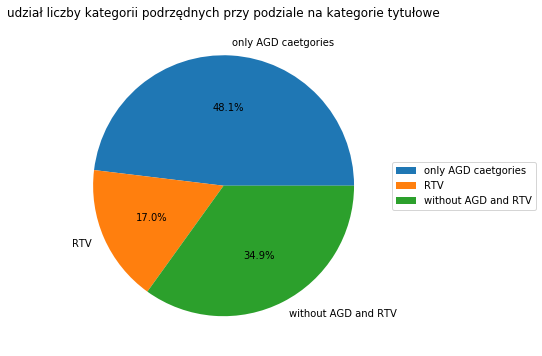

In [126]:
pie_categories = pd.DataFrame({'values': [only_within_agd.percent_of_categories.sum(), rtv.percent_of_categories.sum(), without_agd_and_rtv.percent_of_categories.sum()]})
pie_categories.index = ['only AGD caetgories', 'RTV', 'without AGD and RTV']
pie_categories.plot.pie(y='values', autopct='%1.1f%%', figsize=(6,6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('udział liczby kategorii podrzędnych przy podziale na kategorie tytułowe')
plt.ylabel('')
plt.savefig(f'./charts/udział liczby kategorii podrzędnych przy podziale na kategorie tytułowe.png')
plt.show()

##### 4.1.2.1 Wnioski

<p>
Oferty niezwiązane z AGD i RTV stanowią najwiekszą część oferty sklepu euro.com.pl. Na drugim miejscu plasują się kategorie związane z AGD, a dopiero na końcu RTV.</p><p>Powyższe dane pokazują, rozmiar i znaczenie kategorii związanych z komunikacją oraz rozrywką
</p>
<p>
    Najbardziej róznorodną grupą asortymentową są kategorie związane z AGD, a najmniej z RTV - patrz udział kategorii podrzędnych.
</p>

### 4.2 Analiza ilości ofert w kategoriach podrzędnych

#### 4.2.1 Wybrane statystyki

In [71]:
df.offers_count.describe()

count     418.000000
mean       91.303828
std       201.063315
min         1.000000
25%        11.000000
50%        30.000000
75%        89.750000
max      2631.000000
Name: offers_count, dtype: float64

In [72]:
df.offers_count.agg(['min', 'median', 'max', 'mean'])

min          1.000000
median      30.000000
max       2631.000000
mean        91.303828
Name: offers_count, dtype: float64

<p>Poniżej kategoria podrzędna z największą liczbą ofert:</p>

In [73]:
df[df.offers_count == df.offers_count.max()]

,parent_category,category,offers_count
286,telefony-i-nawigacja-gps,folie-ochronne,2631.0


<p>Poniżej kategorie podrzędne z najmniejszą liczbą ofert:</p>

In [74]:
df[df.offers_count == df.offers_count.min()]

,parent_category,category,offers_count
22,agd,systemy-filtrujace-wode,1.0
23,agd,filtry-do-systemow-filtrujacych-wode,1.0
95,agd-male,kombiwary,1.0
98,agd-male,urzadzenie-do-czekolady,1.0
99,agd-male,chlebaki,1.0
159,agd-male,prasowalnice,1.0
170,agd-male,akcesoria-do-fotelikow-samochodowych,1.0
172,agd-male,zabawki,1.0
174,agd-male,pielegnacja-niemowlat,1.0
175,agd-male,lozeczka-dla-dzieci,1.0


#### 4.2.2 Analiza wartości odstających

<p>Przed pominięciem wartości odstających:<p>

In [75]:
df.offers_count.quantile([.01,.25,.50,.75,.99])

0.01      1.00
0.25     11.00
0.50     30.00
0.75     89.75
0.99    731.13
Name: offers_count, dtype: float64

In [76]:
q1, q3 = df.offers_count.quantile([.25,.75])
iqr = q3 - q1

print(f'Rozspęp kwartylny: {iqr}')

Rozspęp kwartylny: 78.75


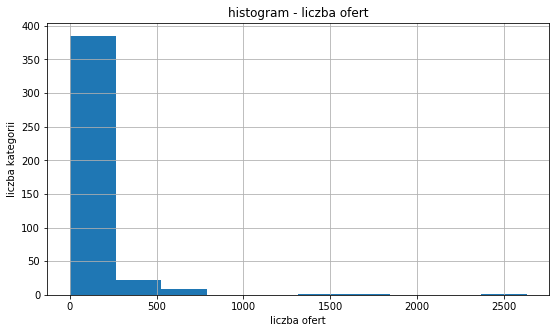

In [77]:
df.offers_count.plot.hist(figsize=(9,5))
plt.title("histogram - liczba ofert")
plt.xlabel('liczba ofert')
plt.ylabel('liczba kategorii')
plt.grid()
plt.savefig('./charts/histogram - liczba ofert.png')
plt.show()

In [78]:
down_boundary = q1-iqr*1.5
upper_boundary = q3+iqr*1.5

without_outliers = df[(df.offers_count < upper_boundary) & (df.offers_count > down_boundary)]

<p>Po pominięciu wartości odstających:</p>

In [79]:
without_outliers.quantile([.01,.25,.50,.75,.99])

,offers_count
0.01,1.00
0.25,10.00
0.50,25.50
0.75,61.25
0.99,178.48


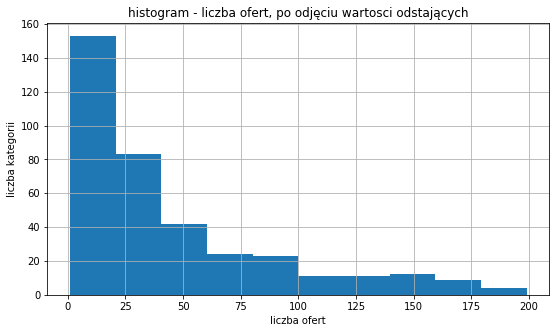

In [80]:
without_outliers.offers_count.plot.hist(figsize=(9,5))
plt.title("histogram - liczba ofert, po odjęciu wartosci odstających")
plt.xlabel('liczba ofert')
plt.ylabel('liczba kategorii')
plt.grid()
plt.savefig('./charts/histogram - liczba ofert, po odjęciu wartosci odstających.png')
plt.show()

In [81]:
outliers = df[~df.category.isin(without_outliers.category)]
outliers.offers_count.describe()

count      46.000000
mean      476.434783
std       432.093285
min       222.000000
25%       259.000000
50%       320.500000
75%       501.000000
max      2631.000000
Name: offers_count, dtype: float64

<p>Powyżej wybrane statystyki dla kategorii odstających pod względem ilości ofert, a poniżej nazwy tych kategorii z liczbą ofert posortowane od najliczniejszej:</p>

In [82]:
outliers.sort_values(by='offers_count', ascending=False)[['category', 'offers_count']].values.tolist()

[['folie-ochronne', 2631.0],
 ['zlewozmywaki', 1676.0],
 ['sluchawki', 1355.0],
 ['laptopy-i-netbooki', 779.0],
 ['telefony-komorkowe', 733.0],
 ['monitory-led-i-lcd', 722.0],
 ['okapy', 700.0],
 ['baterie-kuchenne', 654.0],
 ['myszy', 638.0],
 ['smartwatch', 611.0],
 ['kable-do-telefonow', 585.0],
 ['lodowki', 503.0],
 ['torby-do-laptopow', 495.0],
 ['sluchawki-dla-graczy-pc', 448.0],
 ['plyty-do-zabudowy', 444.0],
 ['telewizory-led-lcd-plazmowe', 428.0],
 ['pamieci-ram', 395.0],
 ['kawy', 391.0],
 ['czajniki', 382.0],
 ['akcesoria-do-zegarkow', 355.0],
 ['ladowarki-akumulatory-przenosne', 325.0],
 ['pendrive-pamieci-usb', 323.0],
 ['patelnie', 321.0],
 ['kable-apple-ipod-iphone-ipad', 320.0],
 ['piekarniki-do-zabudowy', 318.0],
 ['pralki', 296.0],
 ['kable', 295.0],
 ['glosniki-przenosne', 295.0],
 ['uchwyty-do-telefonow', 292.0],
 ['klawiatury', 281.0],
 ['ladowarki-sieciowe', 276.0],
 ['ekspresy-cisnieniowe', 275.0],
 ['garnki', 271.0],
 ['gry-xbox-one', 262.0],
 ['baterie-do-lapto

##### 4.2.2.1 Wnioski

<p>Analiza przed pominięciem wartości odstających pokazała, iż ilość ofert w poszczególnych kategoriach jest bardzo zróżnicowana - widać to z resztą na histogramie.</p>
<p>
    Po pominięciu kategorii odstających oczom ukazał się obraz, iż większość kategorii posiada od 10 do 67 ofert.
    </p><p>Najczęściej kategorie mają od 26 do 33 ofert.
</p>

### Top 10 najwiekszych kategorii podrzędnych po kategoriach głównych:

In [83]:
categories_summary = df.set_index('category').groupby('parent_category').offers_count.nlargest(10)
categories_summary = categories_summary.reset_index()

grouped = categories_summary.groupby('parent_category')

for group in grouped.groups:
    print(f'\n{group}:\n')
    data = categories_summary[categories_summary.parent_category == group].loc[:, 'category':]
    print(data.reset_index())


agd:

   index          category  offers_count
0      0      zlewozmywaki        1676.0
1      1             okapy         700.0
2      2  baterie-kuchenne         654.0
3      3           lodowki         503.0
4      4          patelnie         321.0
5      5            pralki         296.0
6      6            garnki         271.0
7      7           kuchnie         157.0
8      8          zmywarki         110.0
9      9          suszarki         107.0

agd-do-zabudowy:

   index                          category  offers_count
0     10                 plyty-do-zabudowy         444.0
1     11                              kawy         391.0
2     12            piekarniki-do-zabudowy         318.0
3     13              zmywarki-do-zabudowy         147.0
4     14               lodowki-do-zabudowy         112.0
5     15  kuchenki-mikrofalowe-do-zabudowy          85.0
6     16                pralki-do-zabudowy          16.0
7     17            zamrazarki-do-zabudowy          14.0
8     18  